In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

In [2]:
DATASET_PATH ="D:\ARTIFICAL INTELLIGENCE\SEM 2\wavepointer\gesturedata"

In [3]:

# List all items in the dataset path
gesture_classes = os.listdir(DATASET_PATH)

# Filter out non-directory items
gesture_classes = [cls for cls in gesture_classes if os.path.isdir(os.path.join(DATASET_PATH, cls))]

# Count number of images per class
class_counts = {cls: len(os.listdir(os.path.join(DATASET_PATH, cls))) for cls in gesture_classes}

print(class_counts)

{'01_palm': 2000, '02_l': 2000, '03_fist': 2000, '04_fist_moved': 2000, '05_thumb': 2000, '06_index': 2000, '07_ok': 2000, '08_palm_moved': 2000, '09_c': 2000, '10_down': 2000}


C:\Users\sidpa\AppData\Local\Temp\ipykernel_22800\3866365271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


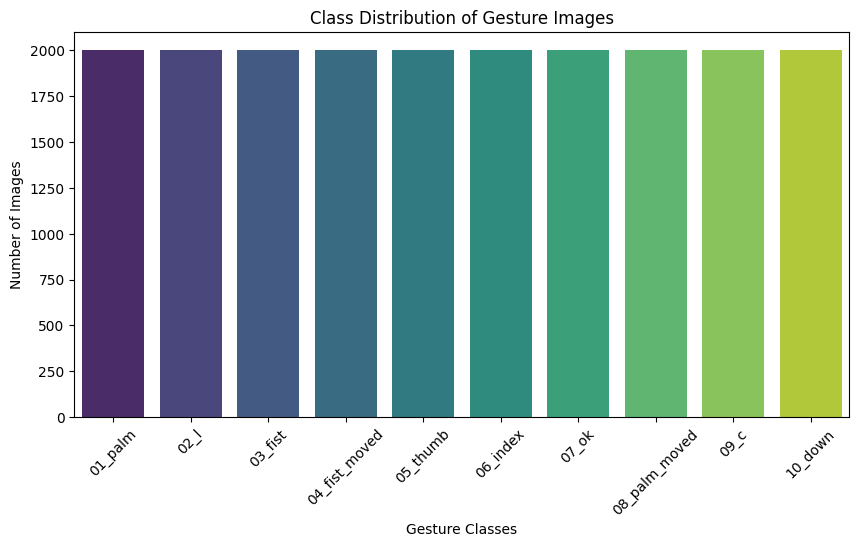

In [4]:
# ---- FIGURE 1: CLASS DISTRIBUTION ----
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.xticks(rotation=45)
plt.title("Class Distribution of Gesture Images")
plt.xlabel("Gesture Classes")
plt.ylabel("Number of Images")
plt.show()

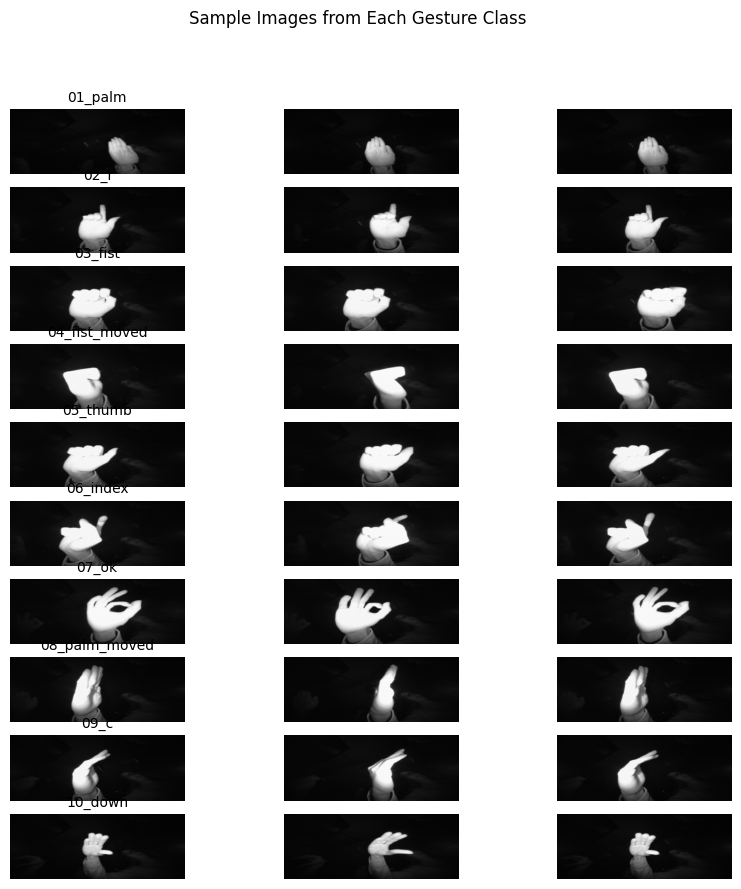

In [5]:
# ---- FIGURE 2: DISPLAY SAMPLE IMAGES ----
def display_sample_images(dataset_path, class_names, samples_per_class=3):
    fig, axes = plt.subplots(len(class_names), samples_per_class, figsize=(10, 10))
    for i, cls in enumerate(class_names):
        img_folder = os.path.join(dataset_path, cls)
        img_files = os.listdir(img_folder)[:samples_per_class]

        for j, img_file in enumerate(img_files):
            img_path = os.path.join(img_folder, img_file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            if j == 0:
                axes[i, j].set_title(cls, fontsize=10)

    plt.suptitle("Sample Images from Each Gesture Class", fontsize=12)
    plt.show()

display_sample_images(DATASET_PATH, gesture_classes, samples_per_class=3)


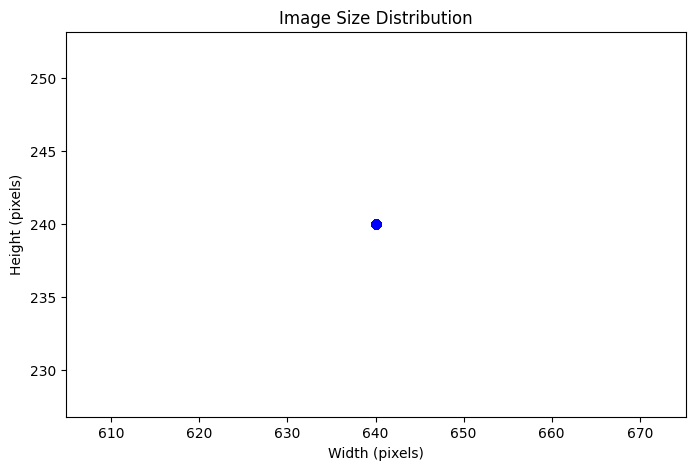

In [7]:
# ---- FIGURE 3: IMAGE SIZE DISTRIBUTION ----
image_sizes = []
for cls in gesture_classes:
    img_folder = os.path.join(DATASET_PATH, cls)
    for img_file in os.listdir(img_folder):
        img_path = os.path.join(img_folder, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            image_sizes.append(img.shape[:2])  # (height, width)

image_sizes = np.array(image_sizes)

plt.figure(figsize=(8, 5))
plt.scatter(image_sizes[:, 1], image_sizes[:, 0], alpha=0.5, color="blue")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.title("Image Size Distribution")
plt.show()

In [6]:
# ---- FIGURE 5: DUPLICATE IMAGE DETECTION ----
image_hashes = set()
duplicate_count = 0

for cls in gesture_classes:
    img_folder = os.path.join(DATASET_PATH, cls)
    for img_file in os.listdir(img_folder):
        img_path = os.path.join(img_folder, img_file)
        with open(img_path, "rb") as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            if file_hash in image_hashes:
                duplicate_count += 1
            else:
                image_hashes.add(file_hash)

print(f"Total Duplicate Images: {duplicate_count}")

Total Duplicate Images: 392


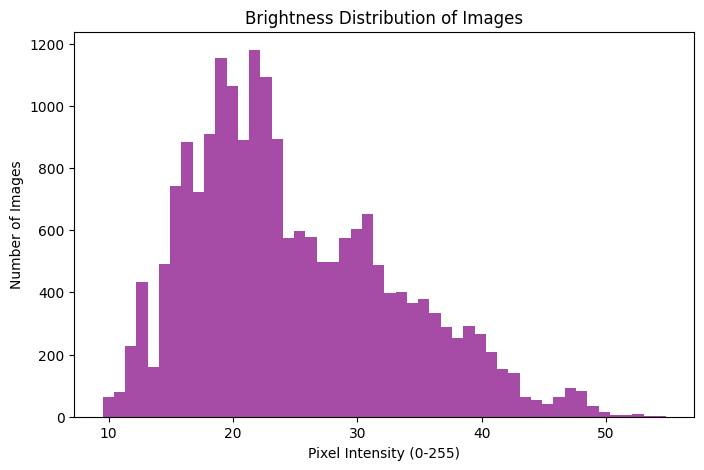

In [8]:
# ---- FIGURE 4: BRIGHTNESS ANALYSIS ----
brightness = []
for cls in gesture_classes:
    img_folder = os.path.join(DATASET_PATH, cls)
    for img_file in os.listdir(img_folder):
        img_path = os.path.join(img_folder, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        if img is not None:
            brightness.append(np.mean(img))  # Compute mean pixel intensity

plt.figure(figsize=(8, 5))
plt.hist(brightness, bins=50, color="purple", alpha=0.7)
plt.title("Brightness Distribution of Images")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Number of Images")
plt.show()